<a href="https://colab.research.google.com/github/SripaliManimekala/datasets/blob/main/AS2019445_MLassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1 - KNN MODEL**

# importing dataset





In [2413]:
import pandas as pd
import numpy as np

In [2414]:
url = 'https://raw.githubusercontent.com/SripaliManimekala/datasets/main/Mobile_Dataset.csv'
dataset = pd.read_csv(url)

In [2415]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# PREPROCESSING DATA

In [2416]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [2417]:
dataset.shape #2000 rows and 21 attributes

(2000, 21)

In [2418]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**handling of missing data**

In [2419]:
print((dataset[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]==0).sum())
#gives columns with zero values and num of zero values ,price range column is omitted

battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
dtype: int64


normally these variables can't have zero values,since it can be considered as missing values.but in this case we can ignore pc and fc.

Here, the attribute screen width (sc_w) can't be zero. but it has 180 zero values. those 180 rows are missing data. those rows with sc_w = 0 should be removed.

In [2420]:
dataset= dataset[dataset['sc_w'] != 0] #remove zero value rows in sc_w column


In [2421]:
(dataset[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]==0).sum()

battery_power      0
clock_speed        0
fc               426
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                88
px_height          1
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
dtype: int64

In [2422]:
dataset.shape #1820 rows and 21 attributes

(1820, 21)

In [2423]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,...,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1237.843956,0.503846,1.519670,0.504396,4.319231,0.524725,32.139560,0.499890,140.585714,4.532967,...,646.731319,1252.686264,2133.372527,12.485714,6.337363,11.007143,0.760989,0.507692,0.513187,1.509341
std,439.940961,0.500123,0.813829,0.500118,4.354894,0.499526,18.114542,0.288805,35.428886,2.289520,...,444.877537,432.342583,1087.197536,4.166849,4.152062,5.455951,0.426597,0.500078,0.499963,1.119285
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.750000,877.000000,1203.750000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.500000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.500000,5.000000,...,561.500000,1250.000000,2174.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,...,952.000000,1633.000000,3072.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [2424]:
print(dataset.isnull().sum())#check for null

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# scaling the dataset (normalization)

 converting data values to same range.

In [2425]:
import sklearn;
from sklearn.preprocessing import MinMaxScaler;
scaler = MinMaxScaler()

for column in dataset.columns:
    if column != 'price_range':
      dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1,1))
dataset

<ipython-input-2425-dea5d5e24742>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1,1))
<ipython-input-2425-dea5d5e24742>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1,1))
<ipython-input-2425-dea5d5e24742>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.352941,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.117647,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.058824,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.411765,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.058824,0.722222,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.176471,0.944444,1.0,1.0,0.0,0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.529412,0.777778,1.0,1.0,1.0,2
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.000000,0.166667,1.0,1.0,0.0,3
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.529412,0.944444,1.0,1.0,1.0,0


# Feature Extraction

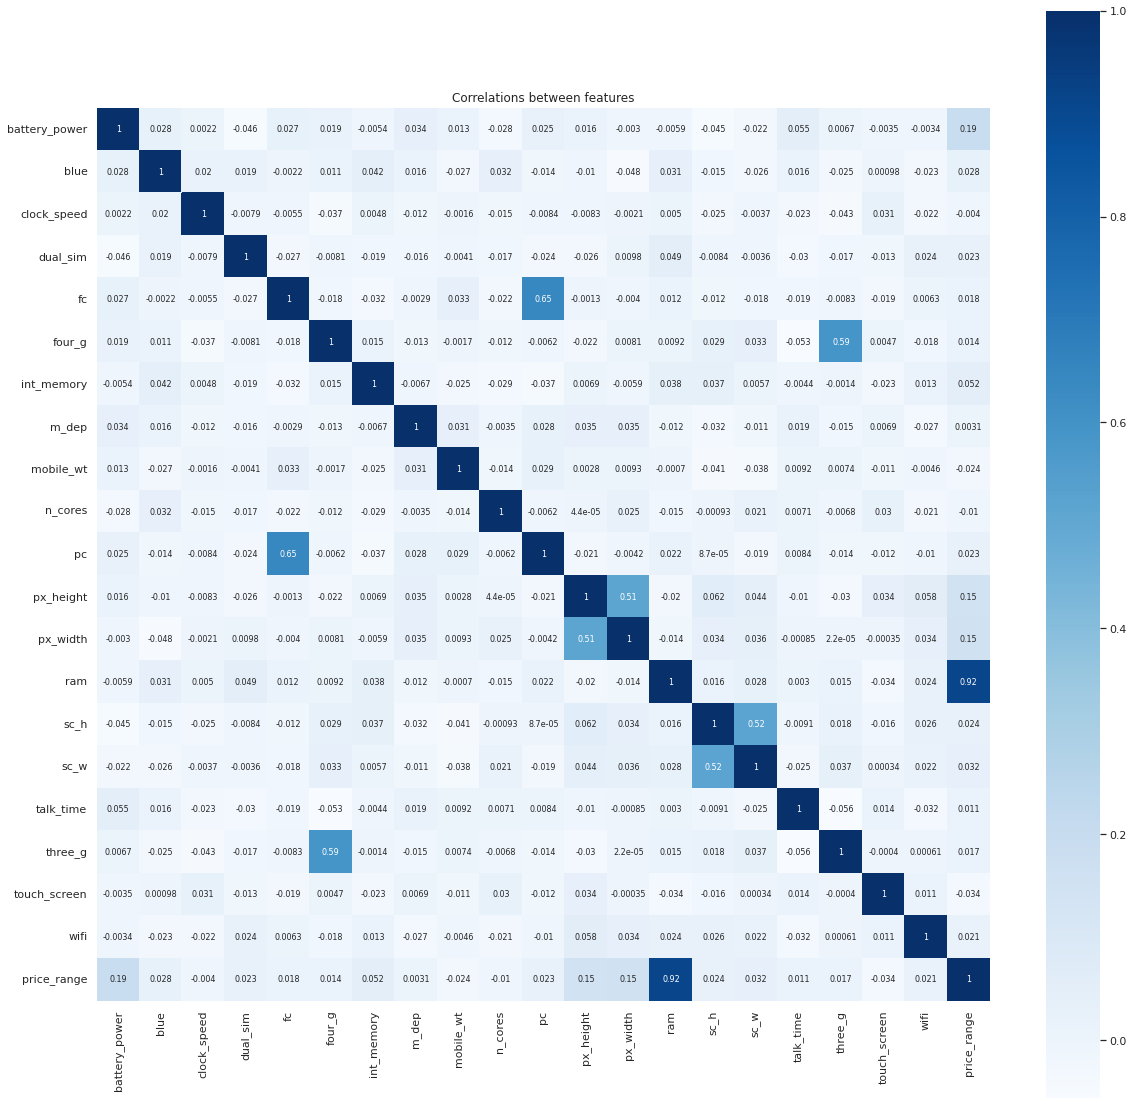

In [2426]:
import matplotlib.pyplot as plt
import seaborn as sb
#lets see correlation between features and targets  
fig = plt.subplots (figsize = (20, 20))
corr = dataset.corr()
sb.heatmap(corr, square = True, cbar = True, annot = True, cmap="Blues", annot_kws = {'size': 8})
plt.title('Correlations between features')
plt.show ()

price_range depends on ram,px_width,px_height,battery_power attributes more than other attributes. lets consider the attributes with coorelation value > 0.015

In [2427]:
cor_target = abs(corr["price_range"])
relevant_features = cor_target[cor_target>0.015]
relevant_features

battery_power    0.194030
blue             0.028416
dual_sim         0.023006
fc               0.017603
int_memory       0.051887
mobile_wt        0.023872
pc               0.023218
px_height        0.150052
px_width         0.150561
ram              0.917026
sc_h             0.024488
sc_w             0.031852
three_g          0.016767
touch_screen     0.034013
wifi             0.020901
price_range      1.000000
Name: price_range, dtype: float64

In [2428]:
columns = ['battery_power', 'blue','dual_sim', 'int_memory', 'mobile_wt','pc', 'sc_h', 'sc_w', 'touch_screen', 'wifi', 'px_height','px_width','ram','price_range'];
selected_columns = dataset[columns]
dataset2 = selected_columns.copy()
dataset2
#'battery_power', 'blue','dual_sim','fc', 'int_memory', 'mobile_wt','pc','px_height','px_width','ram', 'sc_h', 'sc_w','three_g', 'touch_screen', 'wifi','price_range'

,battery_power,blue,dual_sim,int_memory,mobile_wt,pc,sc_h,sc_w,touch_screen,wifi,px_height,px_width,ram,price_range
0,0.227789,0.0,0.0,0.080645,0.900000,0.10,0.285714,0.352941,0.0,1.0,0.010204,0.170895,0.612774,1
1,0.347361,1.0,1.0,0.822581,0.466667,0.30,0.857143,0.117647,1.0,0.0,0.461735,0.993324,0.634687,2
2,0.041416,1.0,1.0,0.629032,0.541667,0.30,0.428571,0.058824,1.0,0.0,0.644388,0.811749,0.627205,2
3,0.076152,1.0,0.0,0.129032,0.425000,0.45,0.785714,0.411765,0.0,0.0,0.620408,0.858478,0.671566,2
4,0.881764,1.0,0.0,0.677419,0.508333,0.70,0.214286,0.058824,1.0,0.0,0.616327,0.475300,0.308658,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,1.0,0.000000,0.216667,0.70,0.571429,0.176471,1.0,0.0,0.623469,0.927904,0.110102,0
1996,0.977956,1.0,1.0,0.596774,0.891667,0.15,0.428571,0.529412,1.0,1.0,0.466837,0.977971,0.474613,2
1997,0.941884,0.0,1.0,0.548387,0.233333,0.15,0.285714,0.000000,1.0,0.0,0.442857,0.755674,0.748530,3
1998,0.675351,0.0,0.0,0.709677,0.541667,0.25,0.928571,0.529412,1.0,1.0,0.171429,0.113485,0.163816,0


# split the data set as features and labels

In [2429]:
X = dataset2.drop(['price_range'], axis=1) # drop outcome column from inputs
Y = dataset2['price_range']

In [2430]:
Y.unique()

array([1, 2, 3, 0])

In [2431]:
mobile_feature_list = list(X.columns)
mobile_feature_list

['battery_power',
 'blue',
 'dual_sim',
 'int_memory',
 'mobile_wt',
 'pc',
 'sc_h',
 'sc_w',
 'touch_screen',
 'wifi',
 'px_height',
 'px_width',
 'ram']

# split TRAINING DATA SET and TEST DATA SET

In [2432]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 7, stratify=Y) #test_size=0.2 means 20% testing 80% training

In [2433]:
print(X_train.shape,Y_train.shape)#shape of training data set ..rows and columns
print(X_test.shape,Y_test.shape)#shape of testing data set

(1456, 13) (1456,)
(364, 13) (364,)


# choosing the correct k value

k value is mostly odd since we take majority and less than 20.

In [2434]:
error_rate=[]#empty list
K_values = list(range(1,20,2))
for i in K_values:
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train,Y_train)
  prediction_i = knn_model.predict(X_test)
  error_rate.append(np.mean(prediction_i != Y_test))

In [2435]:
K_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [2436]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [2437]:
error_rate

[0.47527472527472525,
 0.5467032967032966,
 0.5137362637362637,
 0.4945054945054945,
 0.49175824175824173,
 0.489010989010989,
 0.4725274725274725,
 0.47527472527472525,
 0.5054945054945055,
 0.4807692307692308]

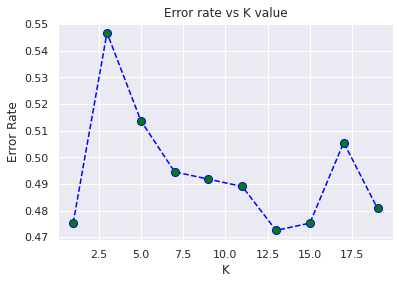

In [2438]:
plt.plot(K_values,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=8)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [2439]:
# determining best k
optimal_k = K_values[error_rate.index(min(error_rate))]

print("The optimal number of neighbors is {}".format(optimal_k))

The optimal number of neighbors is 13


# use a classifier

In [2440]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

In [2474]:
knn_model = KNeighborsClassifier(n_neighbors=13)

In [2475]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [2476]:
#NOW WE CAN GET A PREDICTION FOR TEST DATA
prediction_y = knn_model.predict(X_test)

In [2477]:
prediction_y

array([0, 1, 2, 3, 0, 0, 1, 1, 2, 1, 0, 0, 3, 0, 1, 0, 2, 2, 0, 3, 2, 2,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 3, 0, 3, 0, 2, 1, 2, 2, 2, 2, 0, 3,
       2, 0, 3, 0, 1, 0, 3, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 3, 0, 0, 3,
       2, 1, 0, 3, 1, 1, 0, 0, 1, 3, 1, 3, 3, 1, 3, 1, 2, 0, 0, 1, 3, 1,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 0, 2, 0, 2, 3, 3, 1, 0, 2,
       0, 3, 0, 1, 1, 2, 0, 0, 1, 3, 0, 1, 0, 1, 2, 0, 3, 2, 0, 1, 1, 0,
       0, 2, 2, 3, 2, 1, 3, 2, 0, 3, 3, 3, 0, 0, 2, 2, 2, 1, 1, 0, 3, 2,
       2, 2, 3, 2, 1, 0, 3, 3, 3, 2, 0, 1, 0, 2, 2, 3, 0, 3, 3, 3, 1, 0,
       0, 0, 3, 3, 1, 2, 1, 2, 1, 1, 2, 3, 0, 2, 2, 3, 2, 0, 0, 1, 1, 2,
       0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 0, 0, 1, 0, 1,
       1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 3, 0, 2, 1, 0, 0, 1, 0, 2, 1,
       2, 3, 2, 3, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 3, 0, 0, 0, 2, 1,
       1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 3, 0,
       2, 3, 2, 2, 1, 2, 2, 0, 0, 0, 3, 3, 1, 0, 2,

# check accuracy of above prediction

In [2478]:
from sklearn.metrics import accuracy_score
experiment_accuracy = accuracy_score(Y_test,prediction_y)*100
print('Accuracy score of the KNN model 1 is : ', str(experiment_accuracy))

Accuracy score of the KNN model 1 is :  52.74725274725275


# confusion matrix

In [2479]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sb
%matplotlib inline
sb.set()
get_ipython().run_line_magic('matplotlib','inline')
import matplotlib.pyplot as pt


In [2480]:
#put y test and predictions to confusion matrics
confusionmtrix = confusion_matrix(Y_test,prediction_y)

Text(89.18, 0.5, 'predicted class axis')

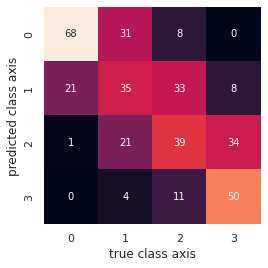

In [2481]:
sb.heatmap(confusionmtrix.T, square=True, annot=True, fmt='d', cbar=False)
pt.xlabel('true class axis')
pt.ylabel('predicted class axis')

# classification report

In [2449]:
from sklearn import metrics
print("",metrics.classification_report(prediction_y,Y_test,target_names=["0","1","2","3"]))

               precision    recall  f1-score   support

           0       0.71      0.63      0.67       102
           1       0.40      0.34      0.37       105
           2       0.40      0.39      0.39        93
           3       0.53      0.77      0.63        64

    accuracy                           0.51       364
   macro avg       0.51      0.53      0.51       364
weighted avg       0.51      0.51      0.50       364



/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# **Q2 - MLP MODEL**

In [2450]:
from tensorflow import keras
import numpy as np
import pandas as pd
 

In [2451]:

url = 'https://raw.githubusercontent.com/SripaliManimekala/datasets/main/Mobile_Dataset.csv'
df = pd.read_csv(url)

In [2452]:
#Changing pandas dataframe to numpy array
x = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

# normalizing data

In [2453]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [2454]:
x

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [2455]:
from sklearn.preprocessing import OneHotEncoder
oh_encode = OneHotEncoder(handle_unknown='ignore')
y_one_hot = oh_encode.fit_transform(y).toarray()

print(y[0],"==>" ,y_one_hot[0])

[1] ==> [0. 1. 0. 0.]


In [2456]:
y_one_hot

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [2457]:
y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]])

In [2458]:
x_train,x_test,y_train,y_test = train_test_split(x,y_one_hot,test_size = 0.2)

# Building the MLP model

In [2459]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
#model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                336       
                                                                 
 dense_73 (Dense)            (None, 4)                 68        
                                                                 
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


# Compiling the model

In [2460]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#from tensorflow.keras.optimizers import SGD

OPTIMIZER = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

# training model

In [2461]:
BATCH_SIZE = 128
EPOCHES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2

model_history = model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/100
10/10 [==============================] - 0s 20ms/step - loss: 1.5190 - accuracy: 0.2773 - val_loss: 1.3977 - val_accuracy: 0.3156
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3429 - accuracy: 0.3367 - val_loss: 1.3037 - val_accuracy: 0.3656
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2526 - accuracy: 0.4187 - val_loss: 1.2341 - val_accuracy: 0.4313
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1829 - accuracy: 0.4773 - val_loss: 1.1678 - val_accuracy: 0.4844
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1161 - accuracy: 0.5180 - val_loss: 1.1032 - val_accuracy: 0.5031
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0511 - accuracy: 0.5578 - val_loss: 1.0393 - val_accuracy: 0.5500
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9879 - accuracy: 0.5867 - val_loss: 0.9762 - val_accuracy: 0.5688
Epoch 8/100


# evaluating the model

In [2462]:
score = model.evaluate(x_test, y_test, verbose=2) 
print('Test score:', score[0]*100) 
print('Test accuracy:', score[1]*100)

13/13 - 0s - loss: 0.1783 - accuracy: 0.9350 - 28ms/epoch - 2ms/step
Test score: 17.827680706977844
Test accuracy: 93.50000023841858


# predictions

In [2463]:
y_probability = model.predict(x_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], " Predicted class = ", y_classes[0])

13/13 [==============================] - 0s 1ms/step
True class =  [0. 0. 0. 1.]  Predicted class =  3


# training analysis

In [2464]:
y_pred = model.predict(x_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 1ms/step


In [2465]:
print(test)
print(pred)

[3, 0, 2, 2, 1, 3, 2, 2, 3, 0, 3, 0, 0, 1, 1, 1, 2, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0, 2, 2, 1, 0, 0, 3, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 3, 0, 1, 3, 1, 2, 2, 0, 2, 3, 1, 2, 2, 3, 0, 1, 1, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 2, 1, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 2, 3, 1, 3, 2, 3, 3, 0, 2, 0, 0, 2, 0, 3, 3, 3, 3, 1, 1, 3, 1, 1, 2, 2, 2, 3, 1, 3, 2, 0, 2, 0, 3, 3, 3, 3, 0, 2, 1, 2, 2, 0, 3, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 3, 2, 2, 3, 3, 1, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 3, 0, 1, 0, 3, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 3, 1, 1, 3, 3, 3, 1, 2, 0, 0, 1, 2, 3, 0, 2, 1, 3, 2, 3, 1, 1, 2, 2, 1, 0, 0, 3, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2, 0, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 2, 3, 2, 2, 1, 2, 0, 3, 2, 1, 3, 3, 3, 2, 0, 2, 0, 2, 3, 2, 2, 0, 0, 3, 0, 3, 3, 1, 3, 0, 2, 1, 1, 1, 3, 3, 3, 0, 0, 3, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 3, 2, 0, 2, 1, 1, 2, 2, 3, 0, 3, 0, 1, 1, 2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 1, 1, 

In [2466]:
from sklearn.metrics import classification_report
print(classification_report(test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.96      0.91      0.93        96
           2       0.89      0.92      0.90        98
           3       0.94      0.93      0.94       106

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.94      0.93       400



# Plotting the model performances

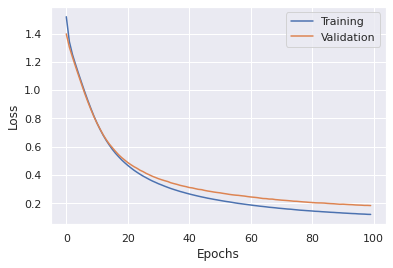

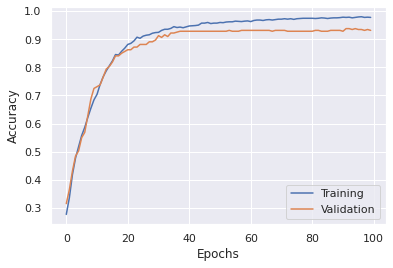

In [2467]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(model_history)

# Saving the trained model and its weights

In [2470]:
json_string = model.to_json() # as json 
open('mlp_mnist_v1_model.json', 'w').write(json_string)
# save the weights in h5 format 
model.save_weights('mlp_mnist_v1_wts.h5')

# Retrieving a trained model and its weights

In [2472]:
from keras.models import model_from_json
model1 = model_from_json(open('mlp_mnist_v1_model.json').read())
model1.load_weights('mlp_mnist_v1_wts.h5')
model1.summary()
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)

y_probability = model.predict(x_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                336       
                                                                 
 dense_73 (Dense)            (None, 4)                 68        
                                                                 
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________
Test score: 0.17827680706977844
Test accuracy: 93.50000023841858
13/13 [==============================] - 0s 1ms/step
True class =  [0. 0. 0. 1.] Predicted class =  3


# compare two models

In [2468]:
import matplotlib.pyplot as plt

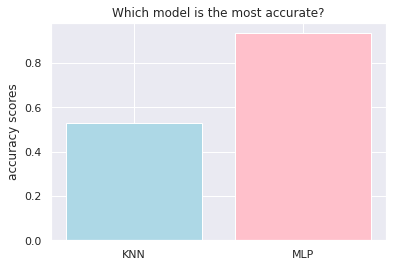

In [2482]:
models = ['KNN','MLP']
acc_scores = [0.5274, 0.9350]

plt.bar(models, acc_scores, color=['lightblue', 'pink'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()